<a href="https://colab.research.google.com/github/ftk1000/w2v_ftk1000/blob/master/word2vec_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec
here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity


    2020.11.16

    Minsuk Heo's code taken (and adapted) from
    https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb

# Collect Data
we will use only 10 sentences to create word vectors

In [1]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [2]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [3]:
corpus = remove_stop_words(corpus)
# [s.split() for s in corpus]
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [4]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

here we have word set by which we will have word vector

In [5]:
print('Number of words =',len(words))
words

Number of words = 12


{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# data generation
we will generate label for each word using skip gram.  

In [6]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [7]:
word2int

{'boy': 8,
 'girl': 9,
 'king': 11,
 'man': 6,
 'pretty': 5,
 'prince': 0,
 'princess': 10,
 'queen': 2,
 'strong': 3,
 'wise': 1,
 'woman': 7,
 'young': 4}

In [8]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

for text in corpus:
    print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [9]:
df = pd.DataFrame(data, columns = ['input', 'label'])
print('df.shape =', df.shape)
df.head()

df.shape = (52, 2)


,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king


In [10]:
df.shape

(52, 2)

In [11]:
word2int

{'boy': 8,
 'girl': 9,
 'king': 11,
 'man': 6,
 'pretty': 5,
 'prince': 0,
 'princess': 10,
 'queen': 2,
 'strong': 3,
 'wise': 1,
 'woman': 7,
 'young': 4}

In [12]:
w2idx = pd.DataFrame.from_dict({ 'values': word2int.values(), 'word': word2int.keys() })
w2idx

,values,word
0,0,prince
1,1,wise
2,2,queen
3,3,strong
4,4,young
5,5,pretty
6,6,man
7,7,woman
8,8,boy
9,9,girl


# Define Tensorflow Graph

In [13]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)
print('ONE_HOT_DIM = ', ONE_HOT_DIM)
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

ONE_HOT_DIM =  12


In [14]:
print(df.head())

for x, y in zip(df['input'], df['label']):
    Xtmp = to_one_hot_encoding(word2int[ x ])
    Ytmp = to_one_hot_encoding(word2int[ y ])
    print(x,'\t has place =',word2int[ x ],'\t===>',Xtmp, '\t\t\t\t',  y ,'===>',Ytmp)
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

    input   label
0    king  strong
1    king     man
2  strong    king
3  strong     man
4     man    king
king 	 has place = 11 	===> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 				 strong ===> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king 	 has place = 11 	===> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 				 man ===> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
strong 	 has place = 3 	===> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 				 king ===> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
strong 	 has place = 3 	===> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 				 man ===> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
man 	 has place = 6 	===> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 				 king ===> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
man 	 has place = 6 	===> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 				 strong ===> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
queen 	 has place = 2 	===> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 				 wise ===> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
queen 	 has place = 2 	===> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

In [15]:
print('Num of entries in X = ',len(X_train))
print('show first three entires in X:\n',X_train[:3])

Num of entries in X =  52
show first three entires in X:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
# pd.options.display.max_rows
pd.options.display.max_columns = 50


In [17]:
df['X_train']=list(X_train)
df['Y_train']=list(Y_train)

pd.set_option('display.width', 1000)
df.head()

,input,label,X_train,Y_train
0,king,strong,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,king,man,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,strong,king,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,strong,man,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,man,king,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [18]:
from keras import models
from keras import layers 

network = models.Sequential()

# https://www.tensorflow.org/api_docs/python/tf/keras/activations
# network.add( layers.Dense(2, activation='relu', input_shape=(12,) ) )
network.add( layers.Dense(2, activation='linear', input_shape=(12,) ) )

network.add( layers.Dense(12, activation='softmax' ) )


In [19]:
network.compile( optimizer='rmsprop', 
                 loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'] )

In [ ]:
network.fit( X_train, Y_train, epochs=2000, batch_size=1)

Epoch 1/2000
52/52 [==============================] - 0s 780us/step - loss: 2.1286 - accuracy: 0.2500
Epoch 2/2000
52/52 [==============================] - 0s 878us/step - loss: 2.1266 - accuracy: 0.2500
Epoch 3/2000
52/52 [==============================] - 0s 921us/step - loss: 2.1235 - accuracy: 0.2500
Epoch 4/2000
52/52 [==============================] - 0s 752us/step - loss: 2.1209 - accuracy: 0.2500
Epoch 5/2000
52/52 [==============================] - 0s 742us/step - loss: 2.1176 - accuracy: 0.2500
Epoch 6/2000
52/52 [==============================] - 0s 726us/step - loss: 2.1153 - accuracy: 0.2500
Epoch 7/2000
52/52 [==============================] - 0s 795us/step - loss: 2.1129 - accuracy: 0.2500
Epoch 8/2000
52/52 [==============================] - 0s 716us/step - loss: 2.1098 - accuracy: 0.2692
Epoch 9/2000
52/52 [==============================] - 0s 742us/step - loss: 2.1076 - accuracy: 0.2692
Epoch 10/2000
52/52 [==============================] - 0s 758us/step - loss: 2.105

In [27]:
network.weights

[<tf.Variable 'dense/kernel:0' shape=(12, 2) dtype=float32, numpy=
 array([[  1.3611581 ,   4.8292747 ],
        [ -5.3851066 ,  -3.5424724 ],
        [ -0.22258565,  -7.381455  ],
        [ -3.2595515 ,  10.845241  ],
        [ -1.5443897 ,   0.39600402],
        [ -6.5328517 ,  -2.1580758 ],
        [  3.071938  ,   1.7843106 ],
        [  2.3099737 , -12.405987  ],
        [  1.0185207 ,   6.6893554 ],
        [ -2.4491675 ,  -4.4333196 ],
        [ -1.159435  ,  -9.701969  ],
        [  1.9205511 ,   5.171864  ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.5678108, -2.4891574], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(2, 12) dtype=float32, numpy=
 array([[-6.9726863, -6.861254 , -7.3220673, -6.017372 , -6.876631 ,
         -6.628013 , -7.330283 , -7.5383554, -6.888759 , -7.1045756,
         -7.1892977, -7.0650864],
        [ 7.178388 ,  6.7969904,  6.8868537,  7.094134 ,  7.016617 ,
          6.791733 ,  7.302099 ,  6.992

In [28]:
# a=network.weights[0]
# a.numpy()

In [29]:
d2 = pd.DataFrame(  network.weights[0].numpy(),  columns = ['x1', 'x2'] )
w2v_df = pd.concat( [w2idx,d2],axis=1 )
w2v_df

,values,word,x1,x2
0,0,prince,1.361158,4.829275
1,1,wise,-5.385107,-3.542472
2,2,queen,-0.222586,-7.381455
3,3,strong,-3.259552,10.845241
4,4,young,-1.544390,0.396004
5,5,pretty,-6.532852,-2.158076
6,6,man,3.071938,1.784311
7,7,woman,2.309974,-12.405987
8,8,boy,1.018521,6.689355
9,9,girl,-2.449167,-4.433320


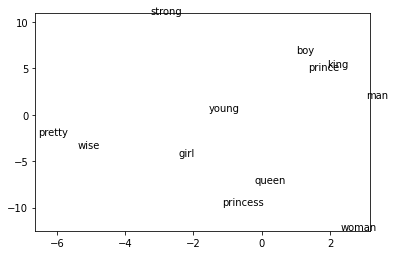

In [30]:

%matplotlib inline
import matplotlib.pyplot as plt

x1 = np.array(w2v_df['x1'])
x2 = np.array(w2v_df['x2'])
plt.close()
PADDING = .1
x_axis_min, x_axis_max = np.min(x1)-PADDING, np.max(x1)+PADDING
y_axis_min, y_axis_max = np.min(x2)-PADDING, np.max(x2)+PADDING


fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,10)
# plt.figure(figsize=(10,10))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)

# plt.scatter(x1, x2, c='red', alpha=0.5)
plt.show()


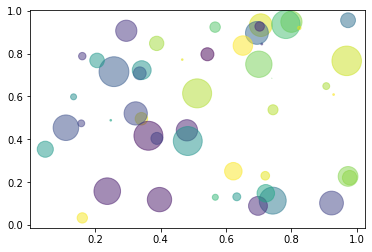

In [167]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [133]:


# # making placeholders for X_train and Y_train
# x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
# y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# # word embedding will be 2 dimension for 2d visualization
# EMBEDDING_DIM = 2 

# # hidden layer: which represents word vector eventually
# W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
# b1 = tf.Variable(tf.random_normal([1])) #bias
# hidden_layer = tf.add(tf.matmul(x,W1), b1)

# # output layer
# W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
# b2 = tf.Variable(tf.random_normal([1]))
# prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# # loss function: cross entropy
# loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# # training operation
# train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

# Train

In [134]:
# sess = tf.Session()
# init = tf.global_variables_initializer()
# sess.run(init) 

# iteration = 20000
# for i in range(iteration):
#     # input is X_train which is one hot encoded word
#     # label is Y_train which is one hot encoded neighbor word
#     sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
#     if i % 3000 == 0:
#         print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

In [135]:
# # Now the hidden layer (W1 + b1) is actually the word look up table
# vectors = sess.run(W1 + b1)
# print(vectors)

# word vector in table

In [ ]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,strong,-5.074393,3.714381
1,prince,-6.660943,-0.225515
2,boy,-1.573136,0.538650
3,princess,-1.737352,-4.974859
4,king,-0.665455,0.615576
5,man,-0.368308,0.569896
6,young,-0.361708,-0.130939
7,wise,-2.511614,-5.351053
8,girl,-2.337072,-3.970424
9,pretty,-3.097544,-3.623812


# word vector in 2d chart

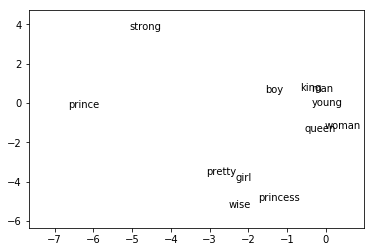

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()